In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


## *IMPORT LIBRARIES*

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## *DATA READING*

In [8]:
df=pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## *DATA DESCRIPTION*
* **CustomerID:** Unique ID assigned to the customer.<br>
* **Annual Income (k$):** Annual Income of the customee.<br>
* **Gender:** Gender of the customer.<br>
* **Age:** Age of the customer.<br>
* **Spending Score (1-100):** Score assigned by the mall based on customer behavior and spending nature.<br>

## *DATA PREPROCESSING & EDA*


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### *SUMMARY STATISTICS*


In [11]:
describe=df.describe().T
describe['nunique']=df.nunique()
describe['NULLS']=df.isna().sum()
describe

,count,mean,std,min,25%,50%,75%,max,nunique,NULLS
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0,200,0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0,51,0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0,64,0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0,84,0


#### *MISSING DATA*


In [13]:
df.isna().sum().sum()

0

#### *DROP HIGH CARDINALITY FEATURES*

In [15]:
df.drop('CustomerID',axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### *VISUALIZATION*

**NOTE**<br>
**Iam using visualization to decide which features should i depend on to cluster the data**

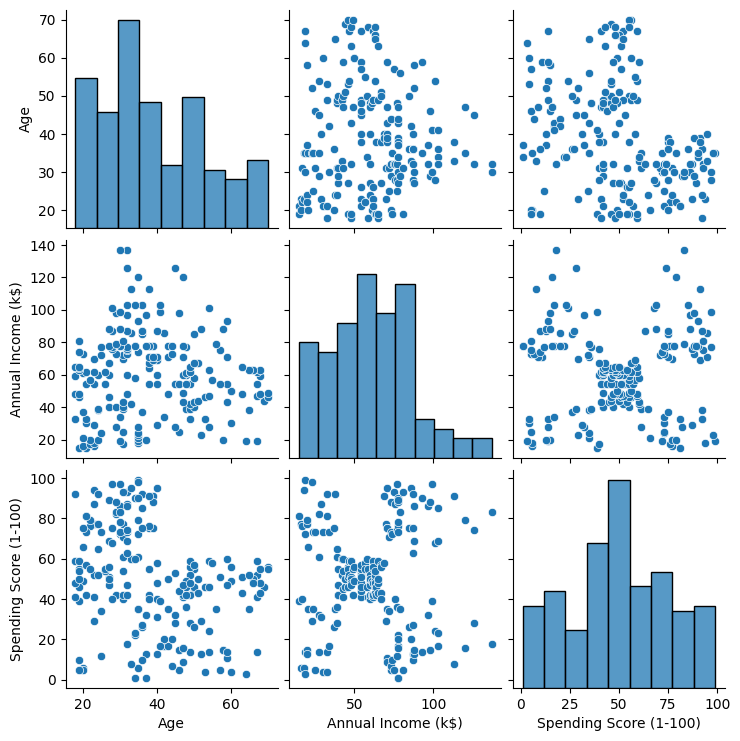

In [19]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

* **from the above visualization the best two features to represent the data are annual income and spending score**

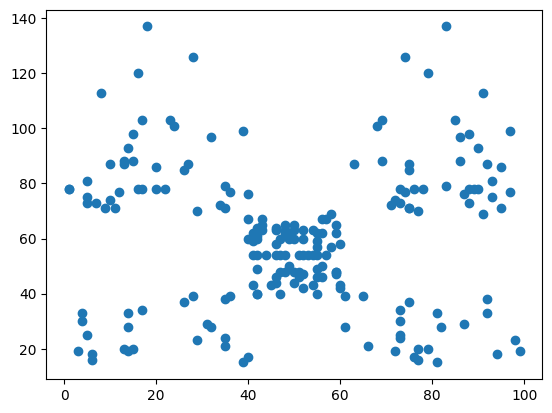

In [20]:
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'])

it looks like  5 clusters

#### *FIT THE MODEL ON TWO SELECTED FEATURES WITH K=8*

In [25]:
k_=KMeans()
k_.fit(df[['Spending Score (1-100)','Annual Income (k$)']])
df['K1_cluster']=k_.predict(df[['Spending Score (1-100)','Annual Income (k$)']])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),K1_cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


#### *NOW LETS VISUALIZE OUR FIRST TRY*

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

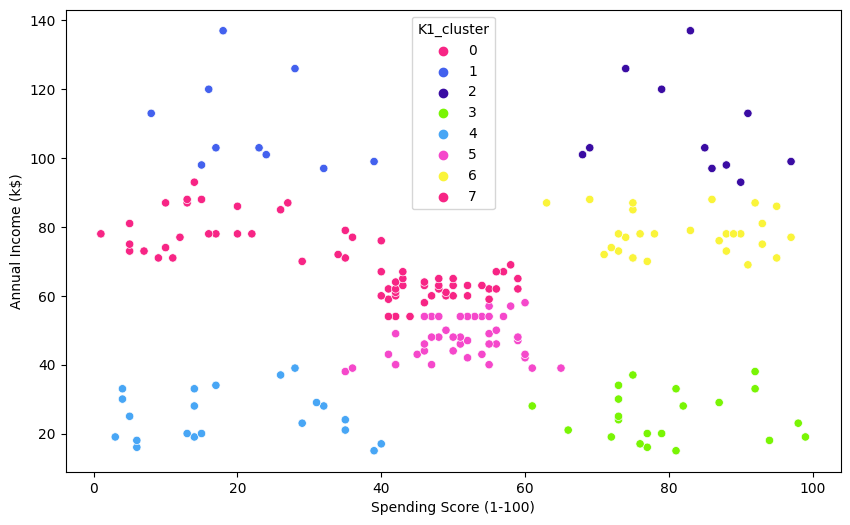

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Spending Score (1-100)',y= 'Annual Income (k$)',hue='K1_cluster',data=df
                ,palette=["#F72585","#4361EE","#3A0CA3","#79F504","#48A6F5","#F548CB" ,"#FAF43A"])

#### *it looks so bad clustering now lets find the best k number using elbow method*

## *HYPER PARAMETER TUNING*

In [33]:
wcss = [] 

clusters = range(1,12) # 1 to 16 rang cluster use for check

for k in clusters:
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(df[['Spending Score (1-100)','Annual Income (k$)']])
    wcss.append(kmeans.inertia_)

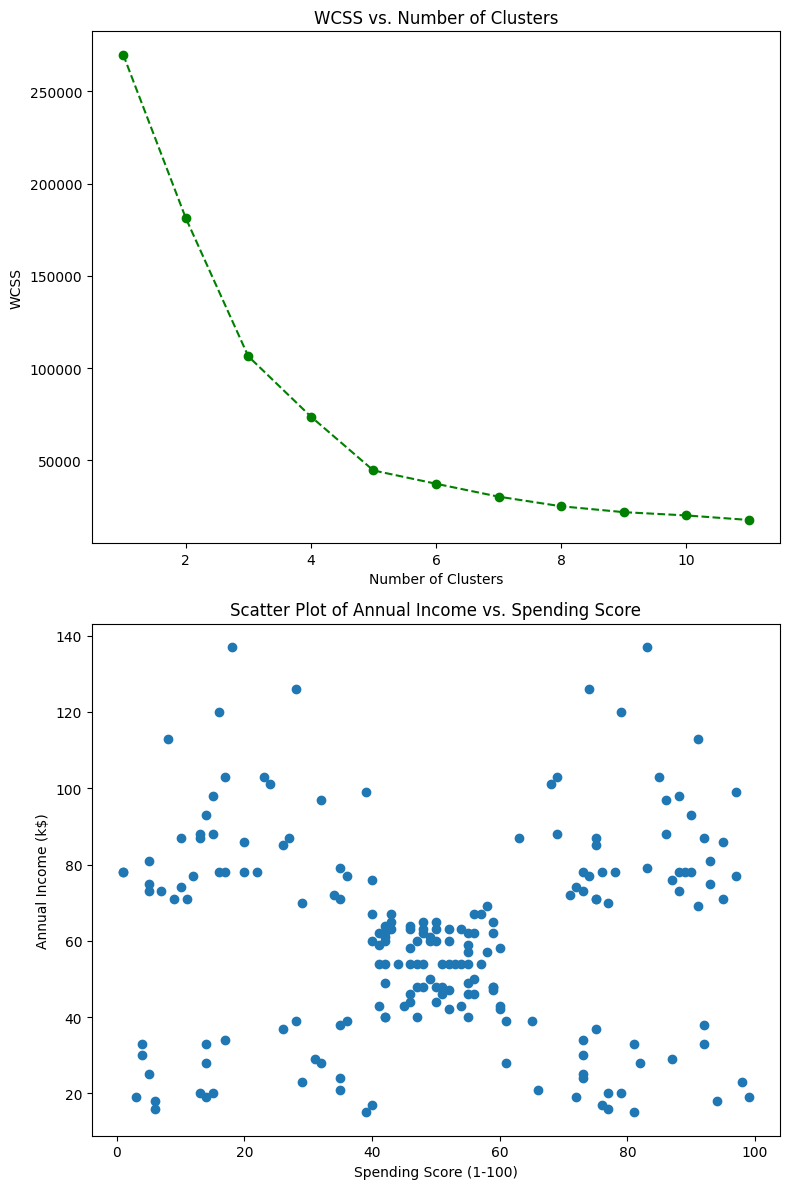

In [44]:
plt.figure(figsize=(8, 6*2))
plt.subplot(2, 1, 1)
plt.plot(clusters, wcss, 'go--')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(2, 1, 2)
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'])
plt.title('Scatter Plot of Annual Income vs. Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

plt.tight_layout()  
plt.show()

* **as i mentioned before it is looks like that 5 is the best k parameter**

#### *FIT THE MODEL WITH K =5*

In [45]:
k_=KMeans(n_clusters=5)
k_.fit(df[['Spending Score (1-100)','Annual Income (k$)']])
df['K2_cluster']=k_.predict(df[['Spending Score (1-100)','Annual Income (k$)']])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),K1_cluster,K2_cluster
0,Male,19,15,39,4,2
1,Male,21,15,81,3,4
2,Female,20,16,6,4,2
3,Female,23,16,77,3,4
4,Female,31,17,40,4,2


<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

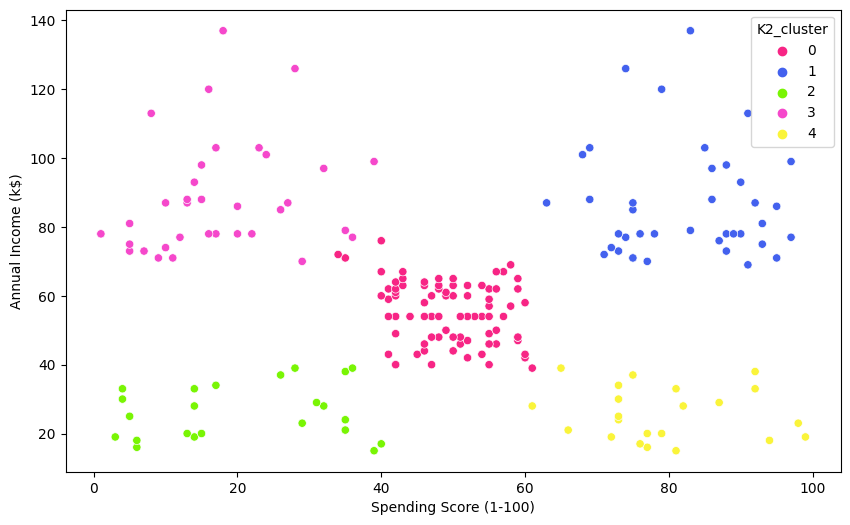

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Spending Score (1-100)',y= 'Annual Income (k$)',hue='K2_cluster',data=df
                ,palette=["#F72585","#4361EE","#79F504","#F548CB" ,"#FAF43A"])

* **and now we can segment new points into one of 5 clustere depending on two features**


In [50]:
k_.predict([[12,22]])


array([2], dtype=int32)

In [51]:
k_.predict([[110,66]])


array([1], dtype=int32)